## Primeiramente iremos importar os dados dado mercado imobiliário da cidade de São Paulo


In [695]:
import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

dados = pd.read_csv(url)

## Explorando os dados

In [696]:
dados.head() #amostrando as primeiras 5 linhas de dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [697]:
dados.sample(5) #amostrando 5 linhas de dados aleatoriamente

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4661,Rua General Eloy Alfaro,Vila Mariana,São Paulo,120,2,2,2,R$ 850.000
1360,NaN,Vila Lageado,São Paulo,83,2,2,1,R$ 530.000
8820,NaN,Vila Madalena,São Paulo,585,4,5,4,R$ 3.200.000
9740,Rua Luiz Bianconi,Jardim Ana Maria,São Paulo,298,3,2,5,R$ 1.010.000
1391,NaN,Jardim Guedala,São Paulo,346,4,4,3,R$ 1.999.000


In [698]:
dados.info() #identificando os tipos das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Pelas tabelas acima podemos observar que as colunas Rua, Bairro, Cidade, e Valor estão classificadas como objetos. Primeiramente iremos transformar as 3 primeiras en string e a última em float.

In [699]:
dados.columns = dados.columns.str.lower() #passando as colunas para lowercase para facilitar codificação
dados.head()

,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [700]:
dados['rua'] = dados['rua'].str.lower()
dados['bairro'] = dados['bairro'].str.lower()
dados['cidade'] = dados['cidade'].str.lower()

dados.head()

,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor
0,"avenida itacira, 255",planalto paulista,são paulo,1000,4,8,6,R$ 7.000.000
1,"rua aurelia perez alvarez, 42",jardim dos estados,são paulo,496,4,4,4,R$ 3.700.000
2,rua alba valdez,jardim reimberg,são paulo,125,4,3,2,R$ 380.000
3,NaN,jardim morumbi,são paulo,310,3,2,4,R$ 685.000
4,"rua tobias barreto, 195",mooca,são paulo,100,3,2,2,R$ 540.000


## Iremos agora tratar a coluna valor para transformá-la em float

In [701]:
dados['valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [702]:
dados['valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [703]:
dados['valor'].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [704]:
dados['valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Pela análise acima observamos que existem erros aparentes na coluna 2 do método split. Estes parecem ser indicativos de casas de aluguel. Como estamos analizando preço de venda, iremos eliminar estas linhas posteriormente.

Primeiramente iremos adicionar estas colunas no dataframe

In [705]:
dados[['moeda', 'valor', 'aluguel']] = dados['valor'].str.split(expand = True)
dados.head()

,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor,moeda,aluguel
0,"avenida itacira, 255",planalto paulista,são paulo,1000,4,8,6,7.000.000,R$,None
1,"rua aurelia perez alvarez, 42",jardim dos estados,são paulo,496,4,4,4,3.700.000,R$,None
2,rua alba valdez,jardim reimberg,são paulo,125,4,3,2,380.000,R$,None
3,NaN,jardim morumbi,são paulo,310,3,2,4,685.000,R$,None
4,"rua tobias barreto, 195",mooca,são paulo,100,3,2,2,540.000,R$,None


In [706]:
dados_venda = dados[dados['aluguel'].isnull()]
dados_venda['aluguel'].unique()

array([None], dtype=object)

In [707]:
dados_venda.drop(columns = ['moeda', 'aluguel'], inplace = True)

dados_venda.head()

/tmp/ipykernel_228/440159143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_venda.drop(columns = ['moeda', 'aluguel'], inplace = True)


,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor
0,"avenida itacira, 255",planalto paulista,são paulo,1000,4,8,6,7.000.000
1,"rua aurelia perez alvarez, 42",jardim dos estados,são paulo,496,4,4,4,3.700.000
2,rua alba valdez,jardim reimberg,são paulo,125,4,3,2,380.000
3,NaN,jardim morumbi,são paulo,310,3,2,4,685.000
4,"rua tobias barreto, 195",mooca,são paulo,100,3,2,2,540.000


A coluna valor apresenta um '.' para delimitação de milhar. O python não aceita este parâmetro. Precisamos eliminá-lo e transformar esta variável em float.

In [708]:
dados_venda['valor'] = dados_venda['valor'].str.replace('.','').astype(float)
dados_venda.head()

/tmp/ipykernel_228/1870552619.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_venda['valor'] = dados_venda['valor'].str.replace('.','').astype(float)
/tmp/ipykernel_228/1870552619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_venda['valor'] = dados_venda['valor'].str.replace('.','').astype(float)


,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor
0,"avenida itacira, 255",planalto paulista,são paulo,1000,4,8,6,7000000.00
1,"rua aurelia perez alvarez, 42",jardim dos estados,são paulo,496,4,4,4,3700000.00
2,rua alba valdez,jardim reimberg,são paulo,125,4,3,2,380000.00
3,NaN,jardim morumbi,são paulo,310,3,2,4,685000.00
4,"rua tobias barreto, 195",mooca,são paulo,100,3,2,2,540000.00


In [709]:
dados_venda.describe()

,metragem,quartos,banheiros,vagas,valor
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [710]:
dados_acima_75qt = dados_venda.query('valor > 3500000.00')
dados_acima_75qt.describe()

,metragem,quartos,banheiros,vagas,valor
count,2261.00,2261.00,2261.00,2261.00,2261.00
mean,953.27,4.03,5.30,5.85,7759805.81
std,15762.59,0.92,1.83,3.31,5580504.67
min,110.00,1.00,1.00,1.00,3500001.00
25%,420.00,4.00,4.00,4.00,4500000.00
50%,558.00,4.00,5.00,5.00,5700000.00
75%,750.00,4.00,6.00,7.00,8900000.00
max,750000.00,13.00,14.00,50.00,65000000.00


In [711]:
dados_venda['vagas'].unique()

array([ 6,  4,  2,  1,  3,  5,  8,  7, 10,  9, 20, 13, 25, 14, 12, 11, 38,
       30, 26, 15, 24, 16, 18, 50])

In [712]:
dados_venda[dados_venda['vagas'] == 16]

,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor
2385,NaN,jardim guedala,são paulo,918,5,3,16,9000000.00
2393,NaN,jardim guedala,são paulo,923,5,3,16,9000000.00
5020,rua almirante pereira guimarães,pacaembu,são paulo,700,5,5,16,5897000.00
5072,rua almirante pereira guimarães,pacaembu,são paulo,705,5,5,16,5897000.00
5135,rua almirante pereira guimarães,pacaembu,são paulo,705,5,5,16,5897000.00
9362,NaN,morumbi,são paulo,1100,5,6,16,7000000.00


## Eliminando Outliers baseado nas tabelas acima

In [719]:
dados_clean = dados_venda.query('vagas < 16 & banheiros < 14') 
dados_clean.describe()

,metragem,quartos,banheiros,vagas,valor
count,9119.00,9119.00,9119.00,9119.00,9119.00
mean,432.22,3.44,3.78,3.89,3002936.64
std,7872.21,1.04,1.88,2.29,3701485.77
min,10.00,1.00,1.00,1.00,13000.00
25%,167.00,3.00,2.00,2.00,890000.00
50%,275.00,3.00,4.00,4.00,1800000.00
75%,447.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,12.00,15.00,45825000.00


In [721]:
dados_clean['valor_m2'] = dados_clean['valor'] / dados_clean['metragem']
dados_clean.head()

/tmp/ipykernel_228/3477876253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_clean['valor_m2'] = dados_clean['valor'] / dados_clean['metragem']


,rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor,valor_m2
0,"avenida itacira, 255",planalto paulista,são paulo,1000,4,8,6,7000000.00,7000.00
1,"rua aurelia perez alvarez, 42",jardim dos estados,são paulo,496,4,4,4,3700000.00,7459.68
2,rua alba valdez,jardim reimberg,são paulo,125,4,3,2,380000.00,3040.00
3,NaN,jardim morumbi,são paulo,310,3,2,4,685000.00,2209.68
4,"rua tobias barreto, 195",mooca,são paulo,100,3,2,2,540000.00,5400.00


In [723]:
dados_clean.describe()

,metragem,quartos,banheiros,vagas,valor,valor_m2
count,9119.00,9119.00,9119.00,9119.00,9119.00,9119.00
mean,432.22,3.44,3.78,3.89,3002936.64,7979.20
std,7872.21,1.04,1.88,2.29,3701485.77,5213.25
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,167.00,3.00,2.00,2.00,890000.00,4740.74
50%,275.00,3.00,4.00,4.00,1800000.00,6498.19
75%,447.00,4.00,5.00,5.00,3500000.00,9444.44
max,750000.00,16.00,12.00,15.00,45825000.00,80000.00


## Agora iremos identificar se as variáveis são idependentes

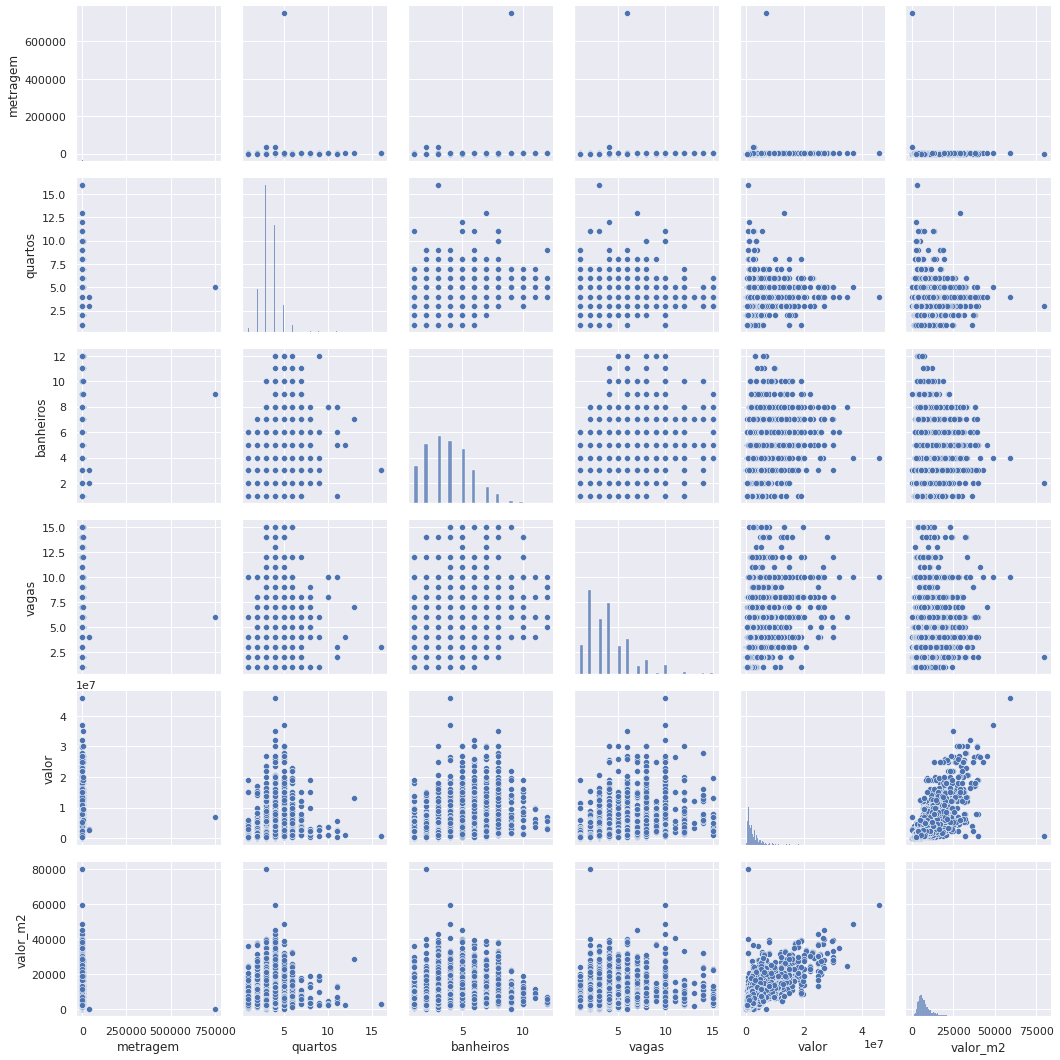

In [724]:
sns.pairplot(dados_clean)

Pelo gráfico acima observamos que as variáveis são idependentes entre sim com exceção de valor e valor_m2. Neste caso iremos escolher o valor_m2 para fazer parte do nosso modelo.